In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/training data.csv')

In [3]:
data.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [4]:
data['fraud'].value_counts()

0    15182
1     2816
Name: fraud, dtype: int64

In [5]:
data.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


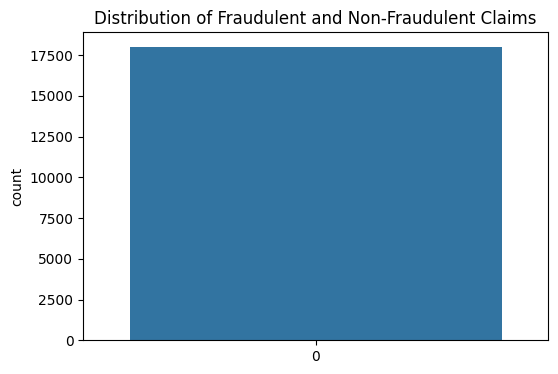

In [6]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data['fraud'])
plt.title('Distribution of Fraudulent and Non-Fraudulent Claims')
plt.show()

Looks like we have an imbalanced dataset

<ipython-input-7-35f099d418f2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


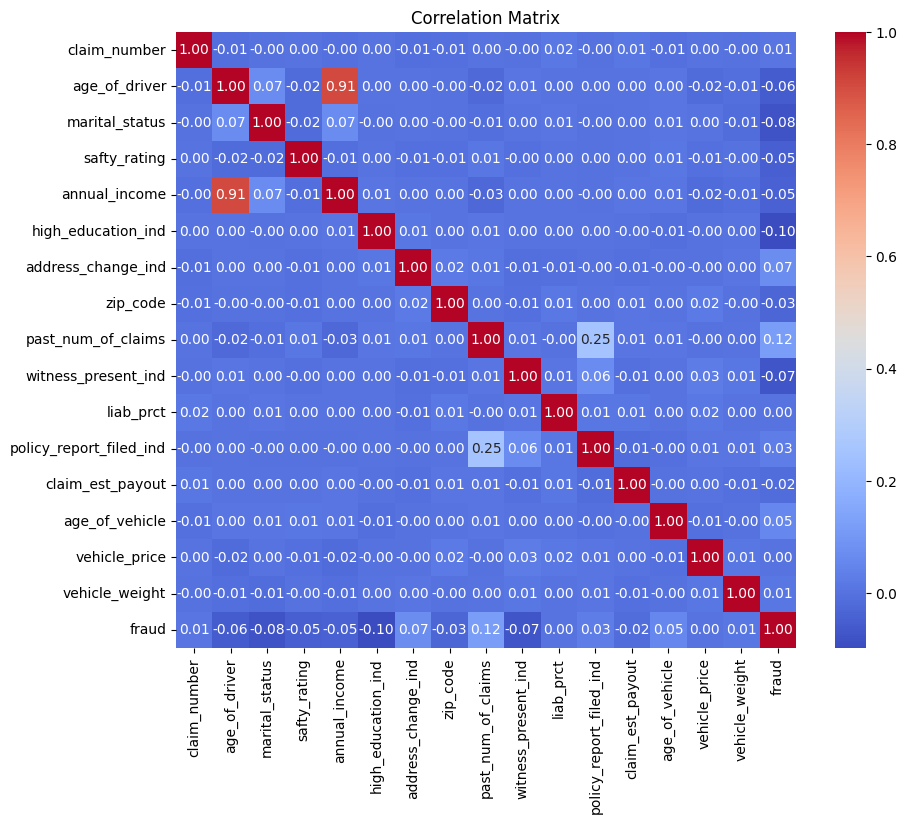

In [7]:
# Visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

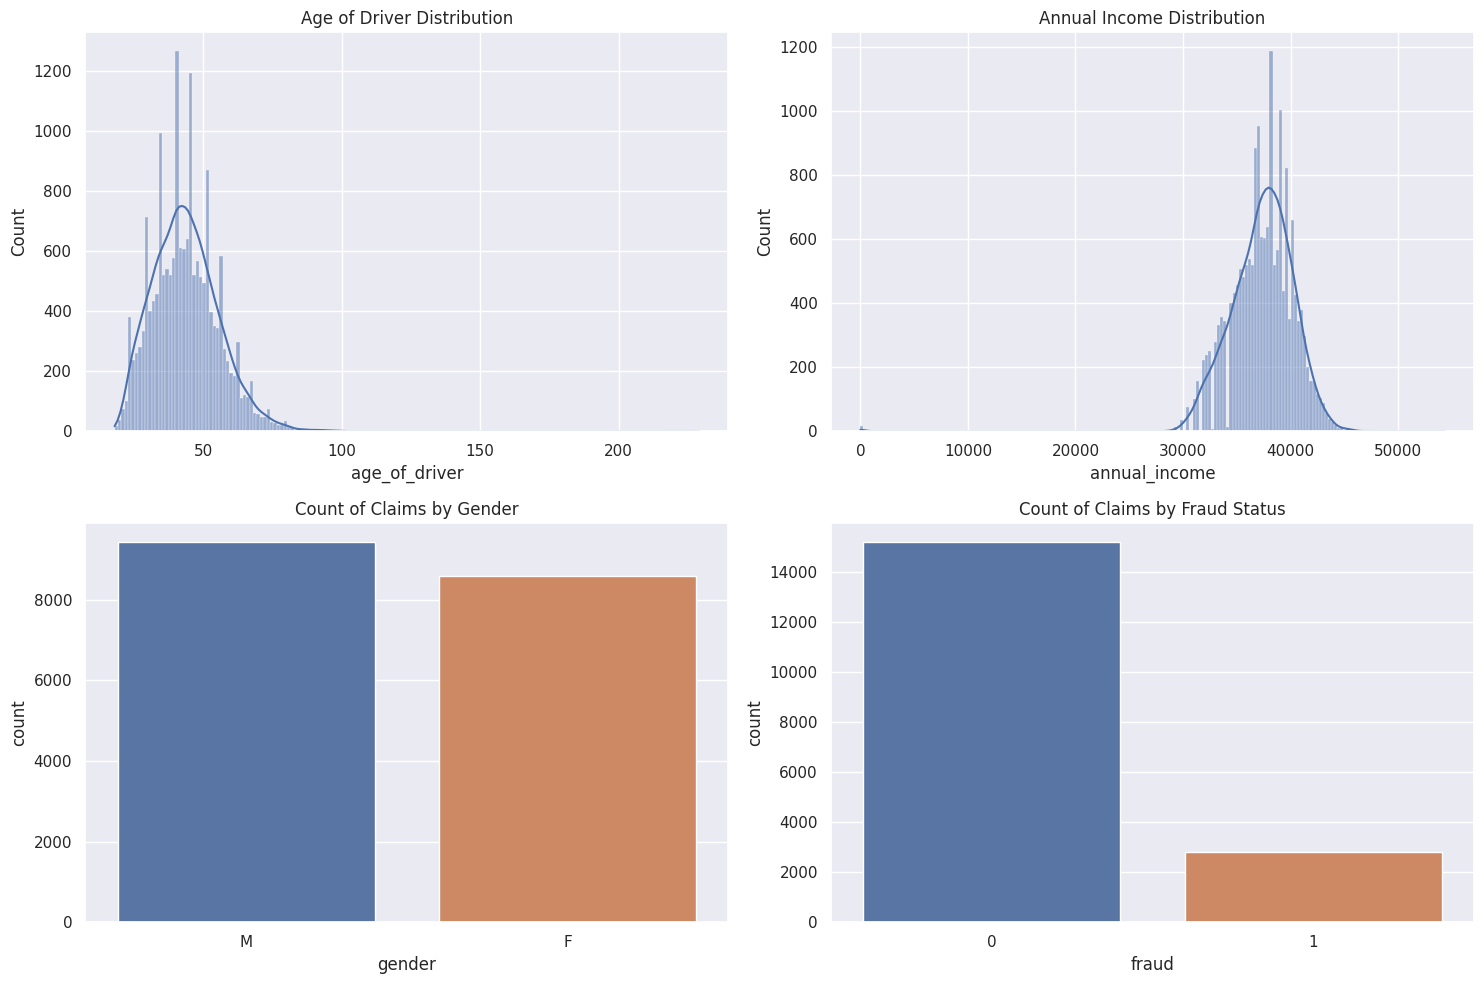

In [8]:
# Set a theme for seaborn
sns.set_theme()

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of 'age_of_driver'
sns.histplot(data=data, x='age_of_driver', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age of Driver Distribution')

# Plot the distribution of 'annual_income'
sns.histplot(data=data, x='annual_income', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Distribution')

# Plot the count of claims by 'gender'
sns.countplot(data=data, x='gender', ax=axes[1, 0])
axes[1, 0].set_title('Count of Claims by Gender')

# Plot the count of claims by 'fraud'
sns.countplot(data=data, x='fraud', ax=axes[1, 1])
axes[1, 1].set_title('Count of Claims by Fraud Status')

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

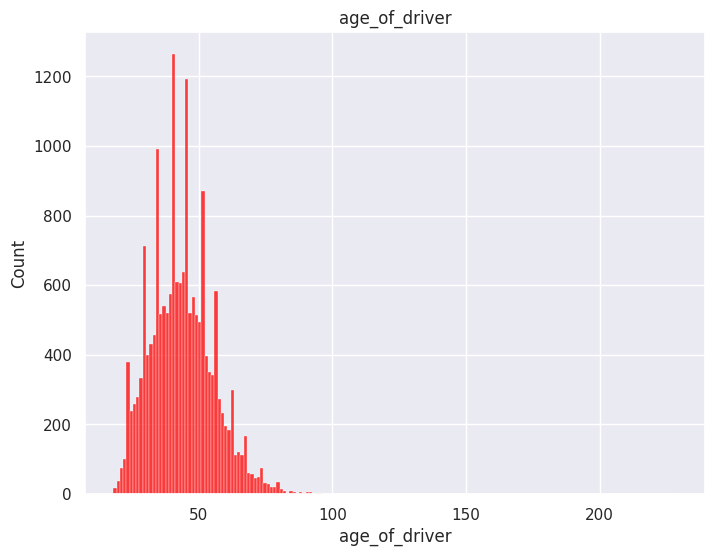

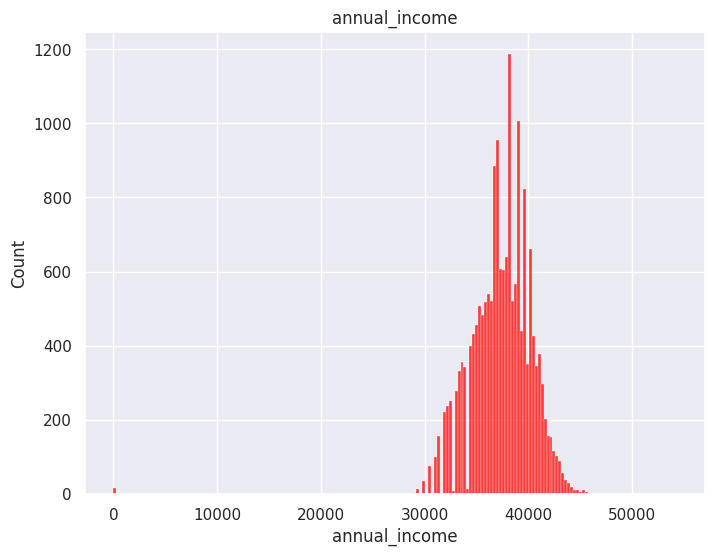

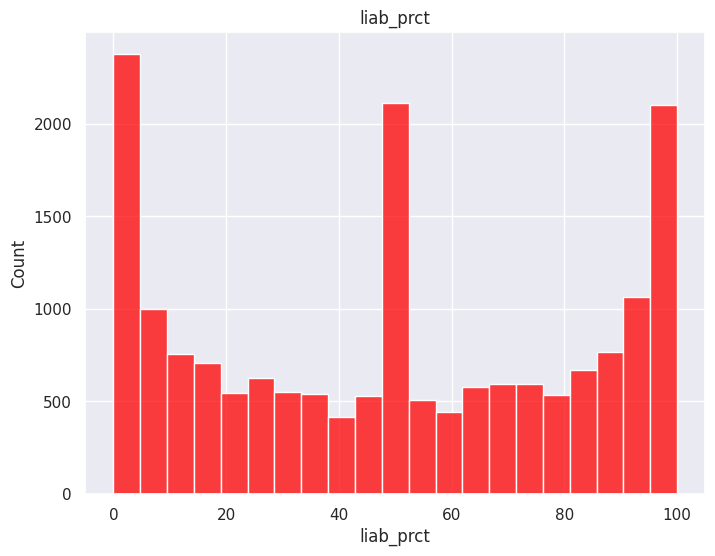

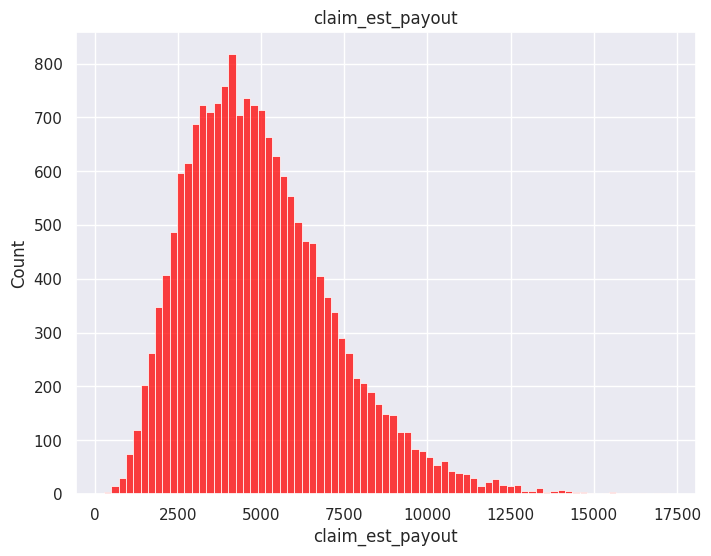

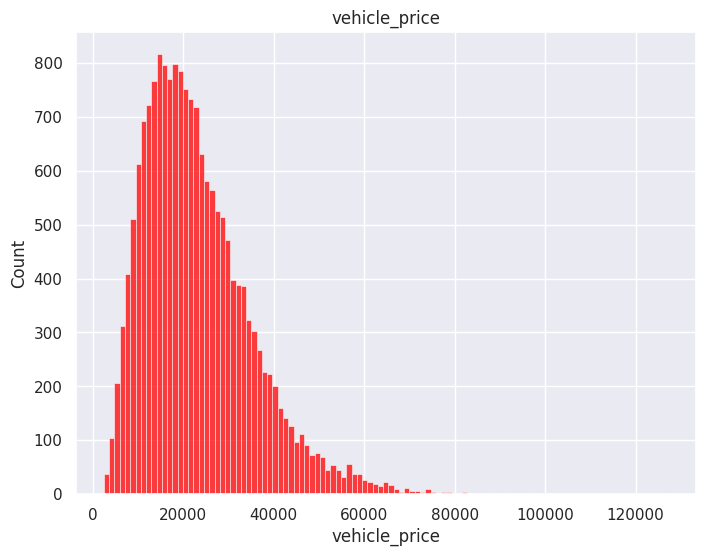

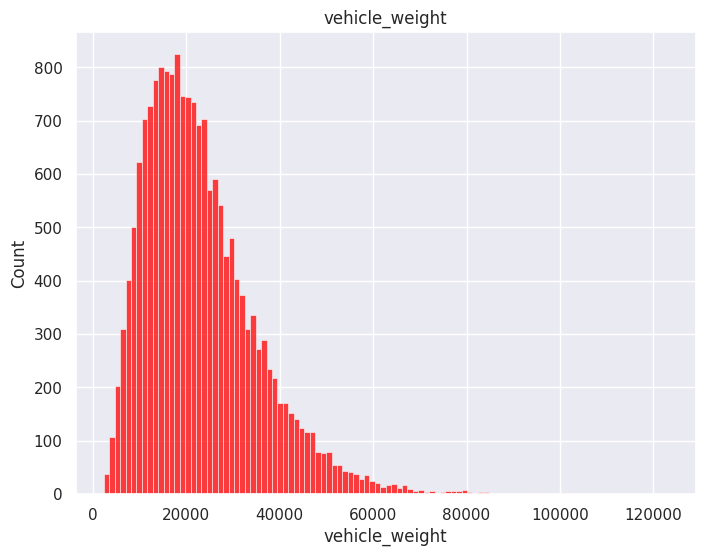

In [9]:
# Select a subset of numerical features to visualize
selected_numerical_features = ['age_of_driver', 'annual_income', 'liab_prct', 'claim_est_payout', 'vehicle_price', 'vehicle_weight']

# Plot histograms for selected numerical features
for feature in selected_numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=False, color='red')
    plt.title(feature)
    plt.show()

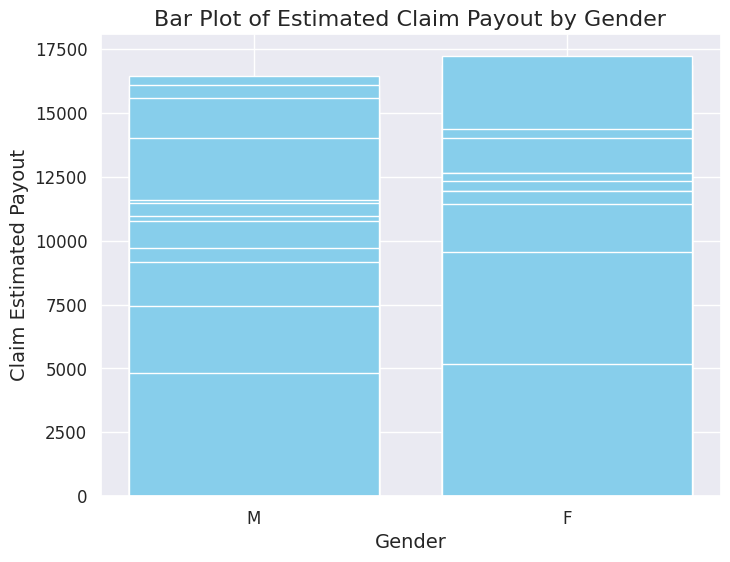

In [10]:
plt.figure(figsize=(8, 6))

# Bar plot with a single color
plt.bar(data['gender'], data['claim_est_payout'], color='skyblue')

plt.ylabel('Claim Estimated Payout', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.title('Bar Plot of Estimated Claim Payout by Gender', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
plt.show()

In [11]:
data.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [12]:
data = data.dropna() #Dropping all null values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17836 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17836 non-null  int64  
 1   age_of_driver            17836 non-null  int64  
 2   gender                   17836 non-null  object 
 3   marital_status           17836 non-null  float64
 4   safty_rating             17836 non-null  int64  
 5   annual_income            17836 non-null  int64  
 6   high_education_ind       17836 non-null  int64  
 7   address_change_ind       17836 non-null  int64  
 8   living_status            17836 non-null  object 
 9   zip_code                 17836 non-null  int64  
 10  claim_date               17836 non-null  object 
 11  claim_day_of_week        17836 non-null  object 
 12  accident_site            17836 non-null  object 
 13  past_num_of_claims       17836 non-null  int64  
 14  witness_present_ind   

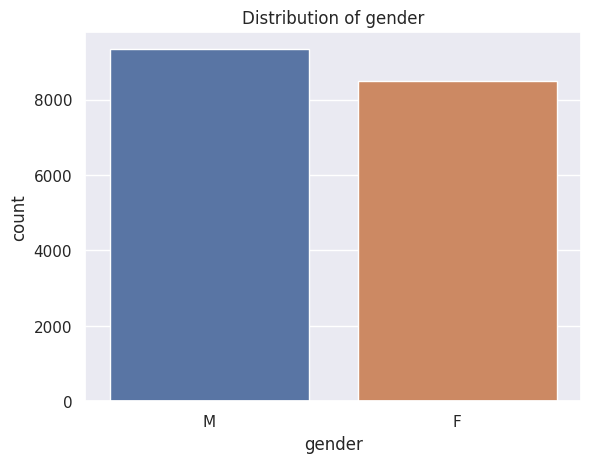

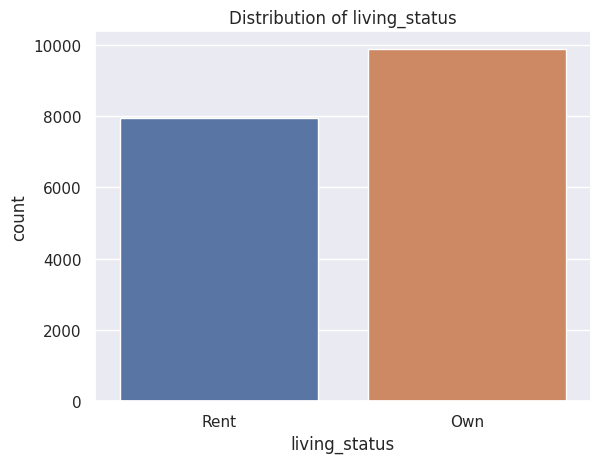

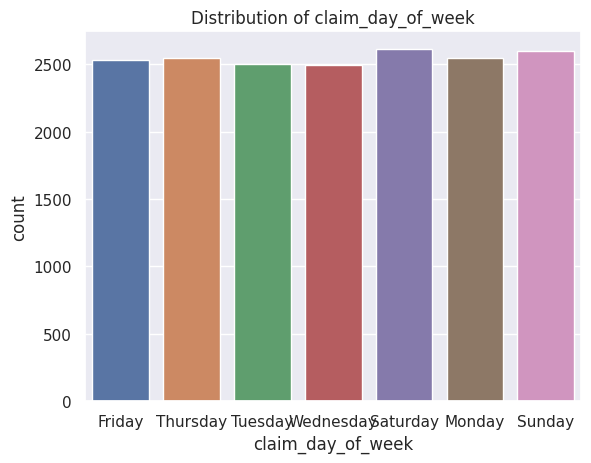

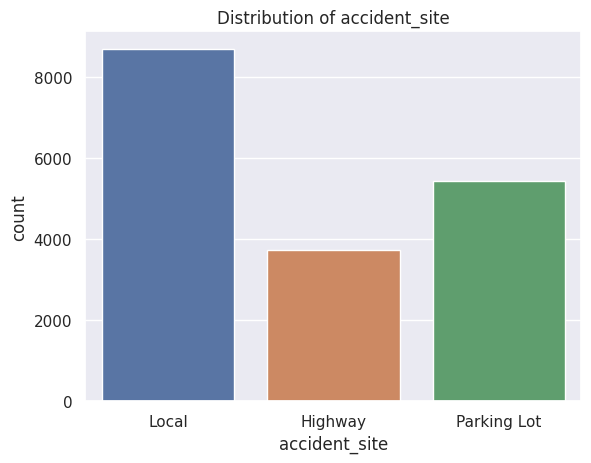

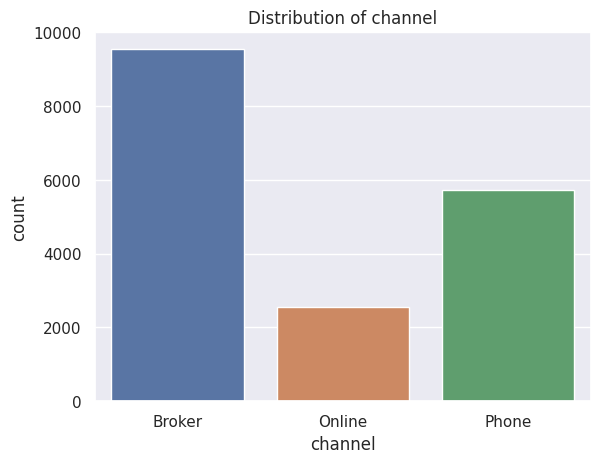

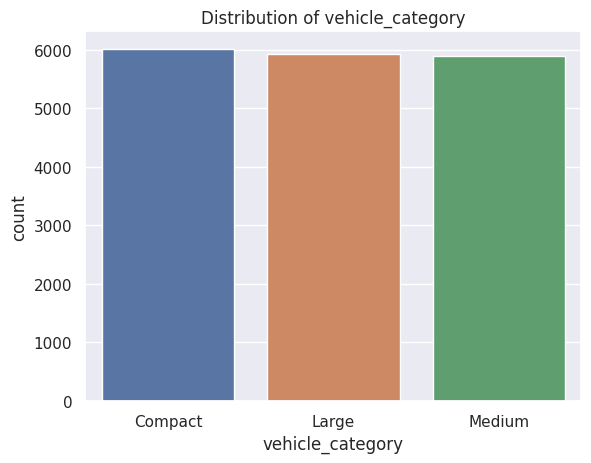

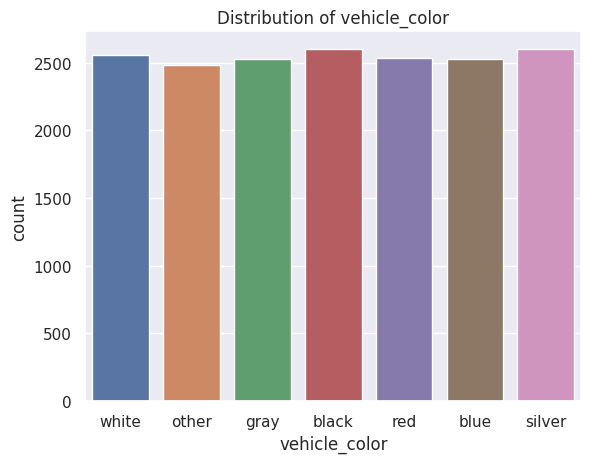

In [14]:
categorical_features = ['gender', 'living_status', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']
for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.title("Distribution of {}".format(feature))
    plt.show()

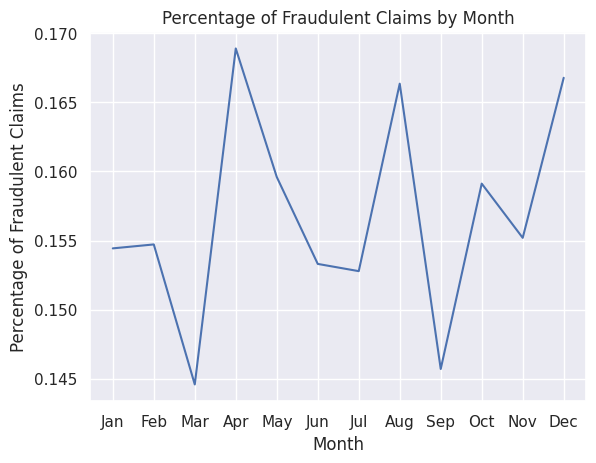

In [15]:
# Assuming 'claim_date' is a temporal feature
data['claim_date'] = pd.to_datetime(data['claim_date'])
data['claim_month'] = data['claim_date'].dt.month

fraud_by_month = data.groupby('claim_month')['fraud'].mean().reset_index()
sns.lineplot(x='claim_month', y='fraud', data=fraud_by_month)
plt.title("Percentage of Fraudulent Claims by Month")
plt.xlabel("Month")
plt.ylabel("Percentage of Fraudulent Claims")
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [16]:
#As we have a lot of categorical features, we'll encode them using one-hot encoding
cat_features = ['gender', 'living_status', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']
data_encoded = pd.get_dummies(data, columns=cat_features)

In [17]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17836 entries, 0 to 17997
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   claim_number                 17836 non-null  int64         
 1   age_of_driver                17836 non-null  int64         
 2   marital_status               17836 non-null  float64       
 3   safty_rating                 17836 non-null  int64         
 4   annual_income                17836 non-null  int64         
 5   high_education_ind           17836 non-null  int64         
 6   address_change_ind           17836 non-null  int64         
 7   zip_code                     17836 non-null  int64         
 8   claim_date                   17836 non-null  datetime64[ns]
 9   past_num_of_claims           17836 non-null  int64         
 10  witness_present_ind          17836 non-null  float64       
 11  liab_prct                    17836 non-nu

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['age_of_driver', 'safty_rating', 'annual_income', 'past_num_of_claims', 'liab_prct', 'claim_est_payout', 'vehicle_price', 'vehicle_weight','age_of_vehicle','marital_status']
data_encoded[num_features] = scaler.fit_transform(data_encoded[num_features])

In [19]:
#X = data_encoded.drop(['fraud', 'claim_number', 'claim_date', 'zip_code'], axis=1)
# drop 'claim_number','zip_code' and 'claim_date' as they are not useful features
#y = data_encoded['fraud']

In [20]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17836 entries, 0 to 17997
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   claim_number                 17836 non-null  int64         
 1   age_of_driver                17836 non-null  float64       
 2   marital_status               17836 non-null  float64       
 3   safty_rating                 17836 non-null  float64       
 4   annual_income                17836 non-null  float64       
 5   high_education_ind           17836 non-null  int64         
 6   address_change_ind           17836 non-null  int64         
 7   zip_code                     17836 non-null  int64         
 8   claim_date                   17836 non-null  datetime64[ns]
 9   past_num_of_claims           17836 non-null  float64       
 10  witness_present_ind          17836 non-null  float64       
 11  liab_prct                    17836 non-nu

####We need to try resampling method to handle our class imbalance problem.
##Downsampling major class.

In [21]:
df_majority = data_encoded[data_encoded.fraud==0]
df_minority = data_encoded[data_encoded.fraud==1]


# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
data_undersampled = pd.concat([df_majority_downsampled, df_minority])

In [22]:
  data_undersampled[data_undersampled['fraud']==0]

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,claim_date,past_num_of_claims,...,vehicle_category_Compact,vehicle_category_Large,vehicle_category_Medium,vehicle_color_black,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white
12038,20020,0.071090,0.0,0.757576,0.643280,1,1,80047,2015-06-20,0.666667,...,0,0,1,0,0,0,1,0,0,0
4035,6730,0.156398,1.0,0.666667,0.723396,1,0,50006,2016-07-01,0.000000,...,0,0,1,0,0,0,0,0,1,0
4828,8004,0.094787,1.0,0.898990,0.669507,1,0,85033,2015-11-29,0.333333,...,1,0,0,0,0,0,1,0,0,0
1560,2589,0.028436,1.0,0.515152,0.585011,1,1,80014,2016-02-23,0.000000,...,0,0,1,0,0,0,0,0,1,0
8512,14128,0.194313,1.0,0.898990,0.750359,0,1,85037,2016-08-11,0.000000,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1536,0.099526,1.0,0.747475,0.674384,1,1,50006,2016-04-23,0.000000,...,1,0,0,0,1,0,0,0,0,0
11577,19221,0.289100,1.0,0.737374,0.804045,1,1,15001,2016-03-30,0.166667,...,1,0,0,1,0,0,0,0,0,0
9452,15720,0.151659,1.0,0.888889,0.719936,0,1,85021,2015-08-14,0.000000,...,1,0,0,0,0,0,1,0,0,0
5549,9187,0.132701,0.0,0.878788,0.704476,1,1,85005,2015-09-09,0.000000,...,1,0,0,0,0,0,1,0,0,0


In [23]:
cols = ['claim_number','zip_code','claim_date']
data_undersampled.drop(columns=cols,inplace=True)

data_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5592 entries, 12038 to 17994
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_of_driver                5592 non-null   float64
 1   marital_status               5592 non-null   float64
 2   safty_rating                 5592 non-null   float64
 3   annual_income                5592 non-null   float64
 4   high_education_ind           5592 non-null   int64  
 5   address_change_ind           5592 non-null   int64  
 6   past_num_of_claims           5592 non-null   float64
 7   witness_present_ind          5592 non-null   float64
 8   liab_prct                    5592 non-null   float64
 9   policy_report_filed_ind      5592 non-null   int64  
 10  claim_est_payout             5592 non-null   float64
 11  age_of_vehicle               5592 non-null   float64
 12  vehicle_price                5592 non-null   float64
 13  vehicle_weigh

In [24]:
y = data_undersampled['fraud']
X = data_undersampled.drop('fraud', axis=1)

# Split the data into training and testing sets
X_train_ds, X_test, y_train_ds, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##GradientBoosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Define a basic Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Define a parameter grid for the GBM model
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5,10]
}

# Initialize a GridSearchCV object to find the best parameters
grid_search = GridSearchCV(gbm, param_grid, scoring='f1', cv=10, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_ds, y_train_ds)

#Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters on the balanced dataset
gbm_best = GradientBoostingClassifier(**best_params, random_state=42)
gbm_best.fit(X_train_ds, y_train_ds)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [26]:
# Predict on the test set
y_pred_up = gbm_best.predict(X_test)

# Generate and print the classification report for the balanced data
classification_report_balanced = classification_report(y_test, y_pred_up)
print(classification_report_balanced)

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       580
           1       0.60      0.74      0.66       539

    accuracy                           0.64      1119
   macro avg       0.64      0.64      0.63      1119
weighted avg       0.65      0.64      0.63      1119



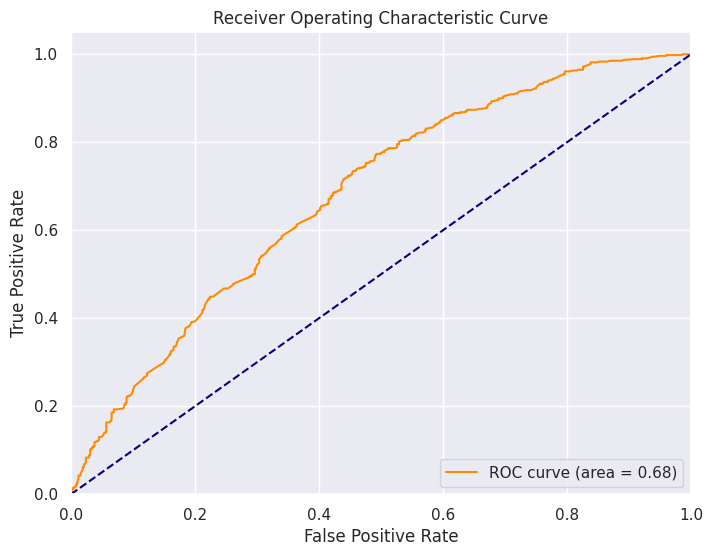

In [27]:
y_pred_proba = gbm_best.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

[[313 267]
 [141 398]]


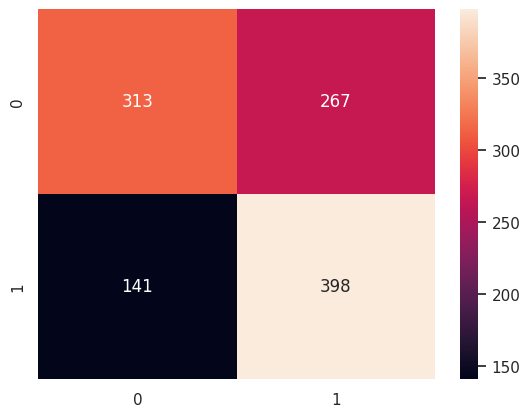

In [28]:
from sklearn.metrics import confusion_matrix

# Now you can call confusion_matrix as a function
cm_gb = confusion_matrix(y_test, y_pred_up)

sns.heatmap(cm_gb, fmt = 'd', annot = True)
# Print the confusion matrix
print(cm_gb)

In [29]:
importances = gbm_best.feature_importances_
importances

array([1.85465741e-03, 2.39915521e-02, 4.62063154e-02, 1.82980155e-01,
       1.08193021e-01, 6.08428232e-02, 1.49447432e-01, 1.03359086e-01,
       0.00000000e+00, 0.00000000e+00, 4.54387937e-02, 4.20819463e-03,
       1.75171495e-03, 1.69716683e-03, 2.28945884e-04, 3.84640771e-03,
       4.91639077e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.05463906e-02, 2.18444397e-03,
       2.48306508e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [30]:
importances= gbm_best.feature_importances_

# Create a DataFrame for visualization
feature_importances= pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort by importance
feature_importances = feature_importances.sort_values("Importance", ascending=False)

# Display the top 10 features
feature_importances.head(10)

,Feature,Importance
28,accident_site_Parking Lot,0.248307
3,annual_income,0.182980
6,past_num_of_claims,0.149447
4,high_education_ind,0.108193
7,witness_present_ind,0.103359
5,address_change_ind,0.060843
2,safty_rating,0.046206
10,claim_est_payout,0.045439
1,marital_status,0.023992
26,accident_site_Highway,0.010546


In [31]:
top_10_features = feature_importances["Feature"][:10].tolist()
X_top_10 = X[top_10_features]

# Split the data into training and test sets
X_train_top_10, X_test_top_10, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the new training and test sets
X_train_top_10.shape, X_test_top_10.shape, y_train.shape, y_test.shape

((4473, 10), (1119, 10), (4473,), (1119,))

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Define a basic Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Define a parameter grid for the GBM model
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}


# Initialize a GridSearchCV object to find the best parameters
grid_search = GridSearchCV(gbm, param_grid, scoring='f1', cv=10, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_top_10, y_train)

#Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters on the balanced dataset
gbm_best = GradientBoostingClassifier(**best_params, random_state=42)
gbm_best.fit(X_train_top_10, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=15,
                           random_state=42)

In [33]:
# Predict on the test set
y_pred_up = gbm_best.predict(X_test_top_10)

# Generate and print the classification report for the balanced data
classification_report_balanced = classification_report(y_test, y_pred_up)
print(classification_report_balanced)

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       560
           1       0.61      0.67      0.64       559

    accuracy                           0.62      1119
   macro avg       0.63      0.62      0.62      1119
weighted avg       0.63      0.62      0.62      1119



[[322 238]
 [183 376]]


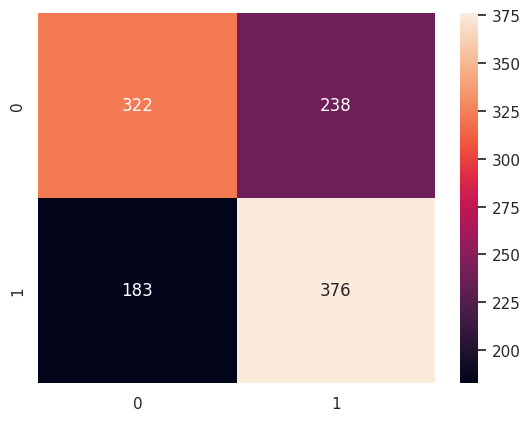

In [34]:
from sklearn.metrics import confusion_matrix

# Now you can call confusion_matrix as a function
cm_gb = confusion_matrix(y_test, y_pred_up)

sns.heatmap(cm_gb, fmt = 'd', annot = True)
# Print the confusion matrix
print(cm_gb)

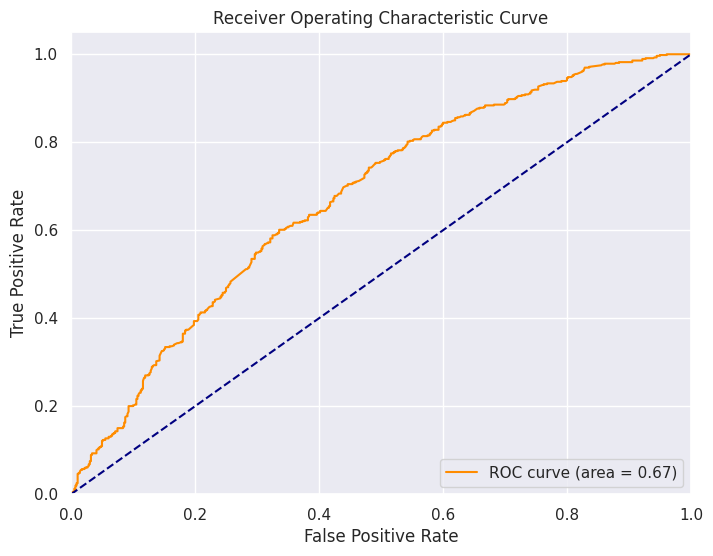

In [35]:
y_pred_proba = gbm_best.predict_proba(X_test_top_10)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Create a DataFrame for visualization
feature_importances= pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort by importance
feature_importances = feature_importances.sort_values("Importance", ascending=False)

top_features = feature_importances.head(10)

In [37]:
top_features

,Feature,Importance
28,accident_site_Parking Lot,0.248307
3,annual_income,0.182980
6,past_num_of_claims,0.149447
4,high_education_ind,0.108193
7,witness_present_ind,0.103359
5,address_change_ind,0.060843
2,safty_rating,0.046206
10,claim_est_payout,0.045439
1,marital_status,0.023992
26,accident_site_Highway,0.010546


In [38]:
top_features['Feature'].dtype

dtype('O')

In [39]:
new_claim = pd.DataFrame({
    'accident_site_Parking Lot': [1],
    'annual_income': [60000],
    'past_num_of_claims': [4000],
    'high_education_ind': [1],
    'witness_present_ind': [1],
    'address_change_ind': [0],
    'safty_rating': [4],
    'claim_est_payout': [2500],
    'marital_status': [1],
    'accident_site_Highway': [0]
})

In [40]:
fraud_prediction = gbm_best.predict(new_claim)
fraud_prediction

array([0])

In [41]:
y_pred_proba = gbm_best.predict_proba(new_claim)
prob = y_pred_proba[0][1]*100
print(f'There is a {prob:.2f}% chance of claim being a fraud')

There is a 34.74% chance of claim being a fraud


In [43]:
import pickle

pickle_file_path = 'gbm_best_model.pkl'

# Save the model as a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(gbm_best, file)

print(f"Model saved as {pickle_file_path}")

Model saved as gbm_best_model.pkl
